### Sustainability Trade-offs In Warehouse Management For The Automotive Sector

Overview:

Recently, logistics software management systems have begun to incorporate Digital Twin technology, 
which can optimize warehouse management systems by integrating time-series forecasting techniques 
(Adjusted Exponential Smoothing, Linear Trend Line, and Seasonal Adjustments) for demand and 
suppliers. Additionally, it addresses transportation shortest path and minimal spanning tree problems 
using methods such as the (Northwest Corner Method, Minimal Cell Cost Method, Vogel 
Approximation Method, Stepping Stone Method, and MODI) Methods in both balanced and 
unbalanced data scenarios.

By implementing a system prototype based on Python, organizations can leverage digital twin 
technology to optimize warehouse management systems effectively. This includes accurately 
forecasting demand, managing supplier relationships, and optimizing transportation logistics. The 
integration of time-series forecasting techniques and transportation optimization methods helps 
improve efficiency, reduce costs, and enhance customer satisfaction.


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Time-Series Forecasting

Import Libraries and Load Data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/synthetic_logistics_data_modified.csv')

# Convert Date/Time of Sale to datetime
data['Date/Time of Sale'] = pd.to_datetime(data['Date/Time of Sale'])


Aggregate Sales Data

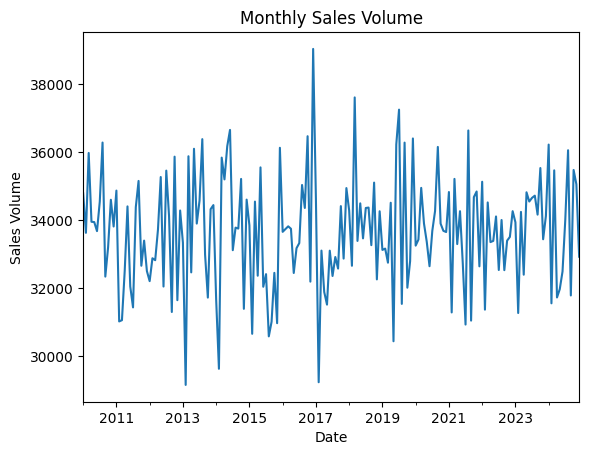

In [35]:
# Aggregate sales data to create a time series
sales_data = data.groupby(data['Date/Time of Sale'].dt.to_period('M'))['Sales Volume'].sum()
sales_data.index = sales_data.index.to_timestamp()

# Plot the sales data
sales_data.plot(title='Monthly Sales Volume')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.show()


Apply Time-Series Forecasting Techniques

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


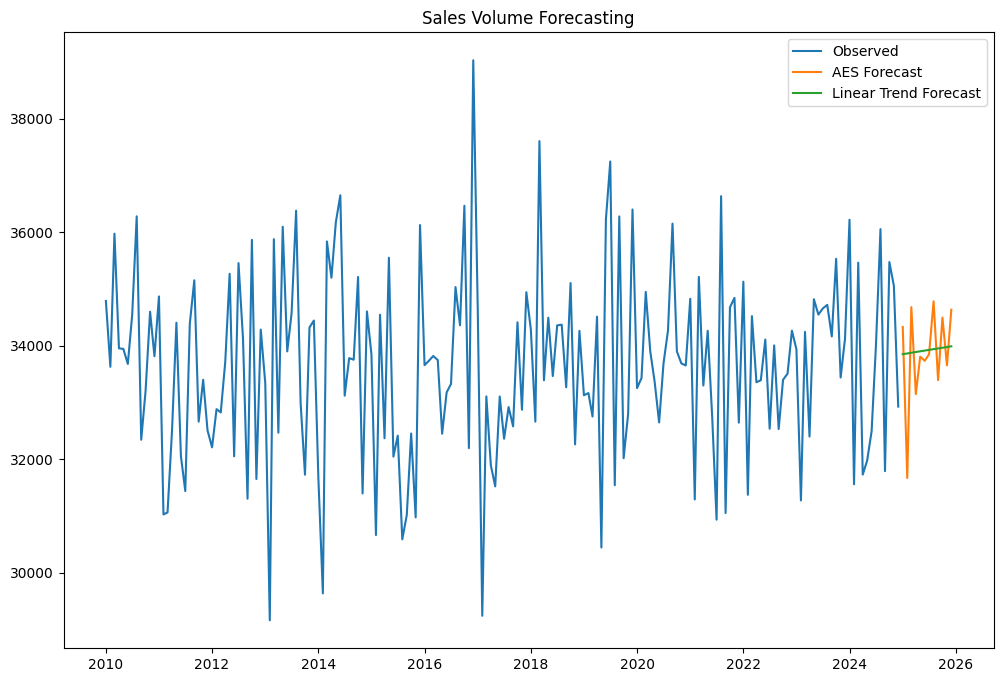

In [36]:
# 1. Adjusted Exponential Smoothing
fit1 = ExponentialSmoothing(sales_data, seasonal_periods=12, trend='add', seasonal='add').fit()
sales_forecast1 = fit1.forecast(12).rename('AES Forecast')

# 2. Linear Trend Line
fit2 = Holt(sales_data).fit()
sales_forecast2 = fit2.forecast(12).rename('Linear Trend Forecast')

# 3. Seasonal Adjustments
decomposition = seasonal_decompose(sales_data, model='additive', period=12)
seasonal_adjusted = sales_data - decomposition.seasonal

# Plot the forecasts
plt.figure(figsize=(12, 8))
plt.plot(sales_data, label='Observed')
plt.plot(sales_forecast1, label='AES Forecast')
plt.plot(sales_forecast2, label='Linear Trend Forecast')
plt.title('Sales Volume Forecasting')
plt.legend()
plt.show()


The AES forecast seems to be a better fit for the data compared to the linear trend forecast because it captures both the trend and the seasonal patterns.

Validate Forecasts

In [37]:
# Calculate Mean Squared Error (MSE) for validation
mse_aes = mean_squared_error(sales_data[-12:], sales_forecast1[:12])
mse_trend = mean_squared_error(sales_data[-12:], sales_forecast2[:12])

print(f'MSE for Adjusted Exponential Smoothing: {mse_aes}')
print(f'MSE for Linear Trend Line: {mse_trend}')


MSE for Adjusted Exponential Smoothing: 1765484.4882737005
MSE for Linear Trend Line: 3134405.5177896023


In [38]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
# 4. ARIMA Model (identify p, d, q parameters using tools like ACF/PACF plots)
# Assuming tentatively identified parameters (adjust based on your data analysis)
arima_model = ARIMA(seasonal_adjusted, order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(12).rename('ARIMA Forecast')

# Calculate Mean Squared Error (MSE) for ARIMA
mse_arima = mean_squared_error(sales_data[-12:], arima_forecast)
print(f"Mean Squared Error (ARIMA): {mse_arima:.2f}")

Mean Squared Error (ARIMA): 3378923.83


In [40]:
# 5. SARIMA Model (identify P, D, Q, m parameters using tools like ACF/PACF plots)
# Assuming tentatively identified parameters (adjust based on your data analysis)
sarima_model = SARIMAX(seasonal_adjusted, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(12).rename('SARIMA Forecast')

# Calculate Mean Squared Error (MSE) for SARIMA
mse_sarima = mean_squared_error(sales_data[-12:], sarima_forecast)
print(f"Mean Squared Error (SARIMA): {mse_sarima:.2f}")

Mean Squared Error (SARIMA): 1389564.70


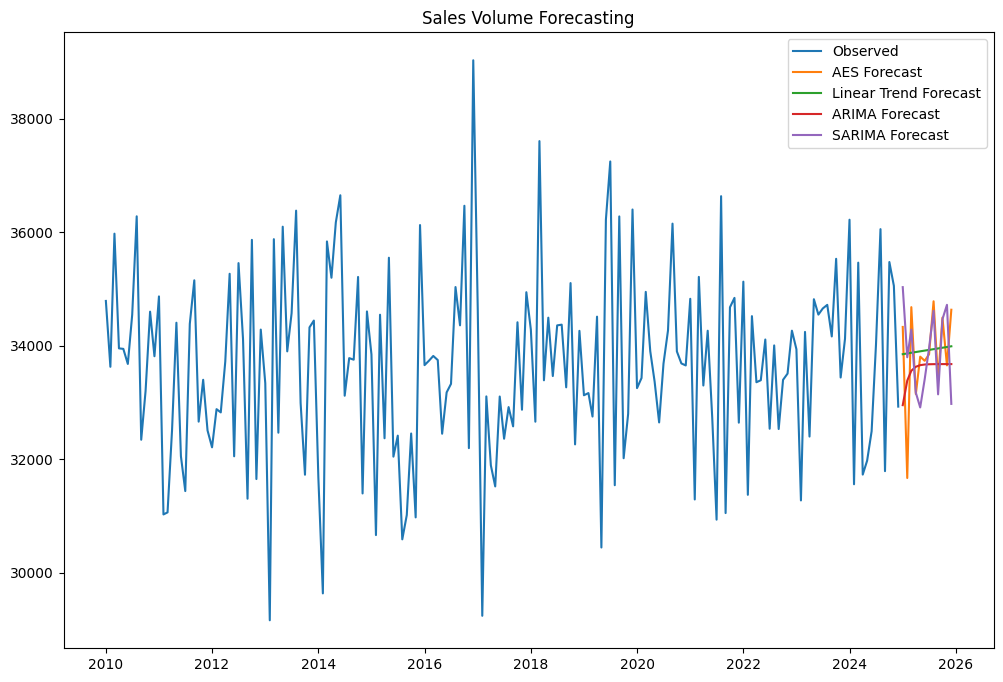

In [41]:
# Plot the forecasts
plt.figure(figsize=(12, 8))
plt.plot(sales_data, label='Observed')
plt.plot(sales_forecast1, label='AES Forecast')
plt.plot(sales_forecast2, label='Linear Trend Forecast')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.title('Sales Volume Forecasting')
plt.legend()
plt.show()

SARIMA (MSE: 1389564.70): This model has the lowest MSE, indicating it has the best overall fit for your sales data. It likely captured both the trend and the seasonal patterns effectively.

AES (MSE: 1765484.488): This model comes in second with a higher MSE than SARIMA. While it still performs better than Linear Trend, it might not have captured the seasonality as well as SARIMA.

ARIMA (MSE: 3378923.83): This model has a higher MSE than both SARIMA and AES. It might have captured some aspects of the data but not as effectively as the other two models.

Linear Trend (MSE: 3134405.518): This model has the highest MSE, suggesting it's the least suitable choice for your data. It likely didn't capture the seasonal fluctuations.

2. Supplier Integration

Integrate Supplier Data

In [42]:
# Extract relevant supplier data
supplier_data = data[['Supplier ID', 'Lead Times', 'Production Capacities', 'Pricing Contracts']].drop_duplicates()

# Forecast Supplier Availability
# Using a simple moving average for demonstration
supplier_availability = supplier_data.groupby('Supplier ID').mean()
supplier_availability


,Lead Times,Production Capacities,Pricing Contracts
Supplier ID,,,
S100,7.407143,266.507143,504.381319
S101,7.661290,300.258065,515.202151
S102,7.322581,264.653226,520.520605
S103,7.396947,268.007634,505.837489
S104,7.845588,275.176471,528.293869
...,...,...,...
S995,7.103448,270.662069,479.439169
S996,6.792593,270.281481,496.629817
S997,7.629921,278.362205,510.153946


3. Transportation Optimization

Implement Transportation Optimization Methods

In [50]:
# Data preparation for transportation optimization
transport_data = data[['Supplier Location', 'Order Locations', 'Distance', 'Fuel Costs', 'Stock Levels', 'Order Size']]

# Create a cost matrix from the data
supplier_locations = transport_data['Supplier Location'].unique()
order_locations = transport_data['Order Locations'].unique()

cost_matrix = np.zeros((len(supplier_locations), len(order_locations)))
for i, supplier in enumerate(supplier_locations):
    for j, order in enumerate(order_locations):
        subset = transport_data[(transport_data['Supplier Location'] == supplier) & (transport_data['Order Locations'] == order)]
        if not subset.empty:
            cost_matrix[i, j] = subset['Fuel Costs'].mean()  # Use the average fuel cost for simplicity

# Extract supply and demand values from the dataset
supply = transport_data.groupby('Supplier Location')['Stock Levels'].sum().values
demand = transport_data.groupby('Order Locations')['Order Size'].sum().values

# Balance the supply and demand if they are unbalanced
total_supply = np.sum(supply)
total_demand = np.sum(demand)

if total_supply > total_demand:
    demand[-1] += total_supply - total_demand
elif total_demand > total_supply:
    supply[-1] += total_demand - total_supply

# Display the cost matrix, supply, and demand vectors
print("Cost Matrix:\n", cost_matrix)
print("Supply Vector:\n", supply)
print("Demand Vector:\n", demand)

Cost Matrix:
 [[505.68816647 509.97929943 505.18640599 502.36567862 508.94815592
  509.62758604 497.51972469 506.39954573 503.73300917 502.30165445]
 [508.60293662 504.8454787  500.48776965 502.74623489 503.28251411
  504.22826126 509.56202139 523.41933957 509.37814418 495.35427767]
 [513.84099963 509.64743055 511.95185326 503.81916252 500.33884592
  499.51430523 501.20628623 507.86743308 515.38439246 504.16014512]
 [517.92984798 501.28322725 498.19391129 514.33955543 515.57435144
  511.44822676 496.90347176 488.65806995 504.55344785 498.95374453]
 [504.27075107 500.27846196 493.91559338 497.77689694 501.04614454
  490.83064554 510.24412653 494.49104739 509.30254521 505.79476793]]
Supply Vector:
 [12132828 11938442 11885523 12015747 12031274]
Demand Vector:
 [  300337   296897   303649   299018   301671   304191   295783   300425
   306562 57295281]


Northwest Corner Method

Initial Solution using Northwest Corner Method:
[[  300337.   296897.   303649.   299018.   301671.   304191.   295783.
    300425.   306562.  9424295.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0. 11938442.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0. 11885523.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0. 12015747.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0. 12031274.]]
Total Transportation Cost: 30089642985.803043


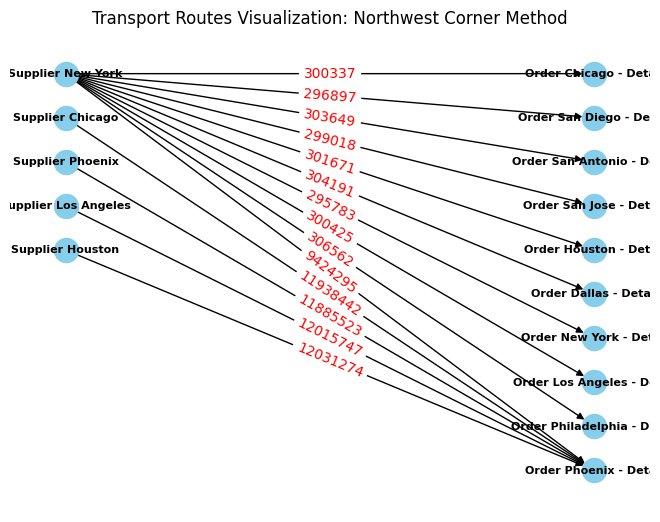

In [45]:
import matplotlib.pyplot as plt
import networkx as nx

# Implementing the Northwest Corner Method with route tracking
def northwest_corner_method_with_routes(cost_matrix, supply, demand):
    rows, cols = cost_matrix.shape
    x = np.zeros((rows, cols))
    routes = []  # List to store routes
    i, j = 0, 0

    while i < rows and j < cols:
        allocation = min(supply[i], demand[j])
        x[i, j] = allocation
        routes.append((i, j, allocation))  # Store the route
        supply[i] -= allocation
        demand[j] -= allocation

        if supply[i] == 0:
            i += 1
        elif demand[j] == 0:
            j += 1

    return x, routes

# Get the initial solution and routes using Northwest Corner Method
initial_solution, routes = northwest_corner_method_with_routes(cost_matrix, supply, demand)

# Calculate total transportation cost
total_cost_ncm = np.sum(initial_solution * cost_matrix)
print("Initial Solution using Northwest Corner Method:")
print(initial_solution)
print(f"Total Transportation Cost: {total_cost_ncm}")

# Visualization of the transport routes using networkx and matplotlib
def visualize_routes(routes, supplier_locations, order_locations):
    G = nx.DiGraph()
    pos = {}

    # Adding nodes
    for i, supplier in enumerate(supplier_locations):
        G.add_node(f'Supplier {supplier}', pos=(0, -i))
        pos[f'Supplier {supplier}'] = (0, -i)

    for j, order in enumerate(order_locations):
        G.add_node(f'Order {order}', pos=(2, -j))
        pos[f'Order {order}'] = (2, -j)

    # Adding edges with the allocation amounts
    for route in routes:
        i, j, allocation = route
        G.add_edge(f'Supplier {supplier_locations[i]}', f'Order {order_locations[j]}', weight=allocation, label=allocation)

    # Drawing the graph
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title('Transport Routes Visualization: Northwest Corner Method')
    plt.show()

# Visualize the routes
visualize_routes(routes, supplier_locations, order_locations)

Minimal Cell Cost Method

Initial Solution using Minimal Cell Cost Method:
[[       0.        0.        0.        0.        0.        0.        0.
         0.        0. 12132828.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0. 11938442.]
 [       0.        0.        0.        0.   301671.        0.        0.
         0.        0. 11583852.]
 [       0.        0.        0.        0.        0.        0.   295783.
    300425.        0. 11419539.]
 [  300337.   296897.   303649.   299018.        0.   304191.        0.
         0.   306562. 10220620.]]

Total Transportation Cost using Minimal Cell Cost Method: 30064533321.544838


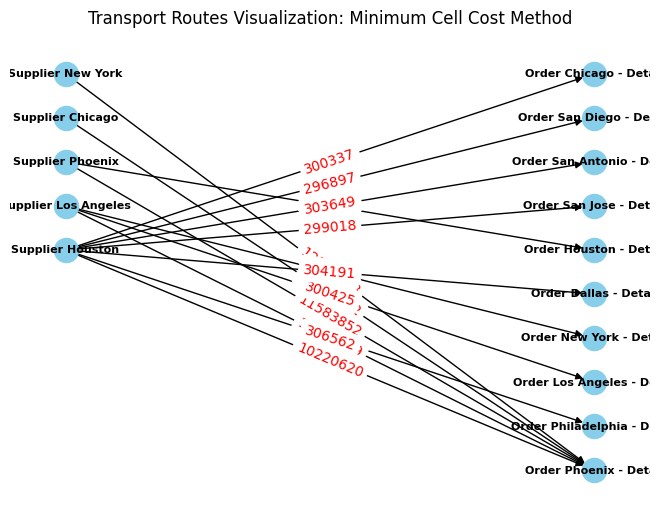

In [47]:
# Implementing the Minimal Cell Cost Method with route tracking
def minimal_cell_cost_method_with_routes(cost_matrix, supply, demand):
    rows, cols = cost_matrix.shape
    x = np.zeros((rows, cols))
    cost_matrix_copy = cost_matrix.copy()
    supply_copy = supply.copy()
    demand_copy = demand.copy()
    routes = []  # List to store routes

    while np.sum(supply_copy) > 0 and np.sum(demand_copy) > 0:
        min_cost = np.min(cost_matrix_copy)
        result = np.where(cost_matrix_copy == min_cost)
        i, j = result[0][0], result[1][0]
        allocation = min(supply_copy[i], demand_copy[j])
        x[i, j] = allocation
        routes.append((i, j, allocation))  # Store the route
        supply_copy[i] -= allocation
        demand_copy[j] -= allocation

        if supply_copy[i] == 0:
            cost_matrix_copy[i, :] = np.inf
        if demand_copy[j] == 0:
            cost_matrix_copy[:, j] = np.inf

    return x, routes

# Get the initial solution and routes using Minimal Cell Cost Method
initial_solution_mcm, routes_mcm = minimal_cell_cost_method_with_routes(cost_matrix, supply, demand)

# Calculate total transportation cost
total_cost_mcm = np.sum(initial_solution_mcm * cost_matrix)

print("Initial Solution using Minimal Cell Cost Method:")
print(initial_solution_mcm)
print("\nTotal Transportation Cost using Minimal Cell Cost Method:", total_cost_mcm)

# Visualization of the transport routes using networkx and matplotlib
def visualize_routes(routes, supplier_locations, order_locations):
    G = nx.DiGraph()
    pos = {}

    # Adding nodes
    for i, supplier in enumerate(supplier_locations):
        G.add_node(f'Supplier {supplier}', pos=(0, -i))
        pos[f'Supplier {supplier}'] = (0, -i)

    for j, order in enumerate(order_locations):
        G.add_node(f'Order {order}', pos=(2, -j))
        pos[f'Order {order}'] = (2, -j)

    # Adding edges with the allocation amounts
    for route in routes:
        i, j, allocation = route
        G.add_edge(f'Supplier {supplier_locations[i]}', f'Order {order_locations[j]}', weight=allocation, label=allocation)

    # Drawing the graph
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title('Transport Routes Visualization: Minimum Cell Cost Method')
    plt.show()

# Visualize the routes
visualize_routes(routes_mcm, supplier_locations, order_locations)

Vogel Approximation Method (VAM)

Initial Solution using Vogel Approximation Method:
[[       0.        0.        0.        0.        0.        0.   295783.
         0.   306562. 11530483.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0. 11938442.]
 [       0.        0.        0.        0.   301671.        0.        0.
         0.        0. 11583852.]
 [       0.        0.        0.        0.        0.        0.        0.
    300425.        0. 11715322.]
 [  300337.   296897.   303649.   299018.        0.   304191.        0.
         0.        0. 10527182.]]

Total Transportation Cost using Vogel Approximation Method: 30063088791.59051


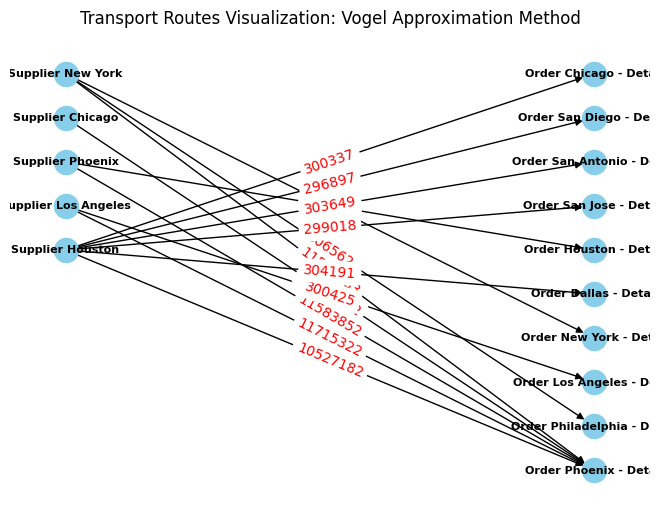

In [49]:
# Implementing the Vogel Approximation Method with route tracking
def vogel_approximation_method_with_routes(cost_matrix, supply, demand):
    rows, cols = cost_matrix.shape
    x = np.zeros((rows, cols))
    cost_matrix_copy = cost_matrix.copy()
    supply_copy = supply.copy()
    demand_copy = demand.copy()
    routes = []  # List to store routes

    while np.sum(supply_copy) > 0 and np.sum(demand_copy) > 0:
        row_penalty = np.zeros(rows)
        col_penalty = np.zeros(cols)

        # Calculate penalties for rows and columns
        for i in range(rows):
            if supply_copy[i] > 0:
                sorted_row_costs = np.sort(cost_matrix_copy[i])
                if len(sorted_row_costs) > 1:
                    row_penalty[i] = sorted_row_costs[1] - sorted_row_costs[0]
                else:
                    row_penalty[i] = 0

        for j in range(cols):
            if demand_copy[j] > 0:
                sorted_col_costs = np.sort(cost_matrix_copy[:, j])
                if len(sorted_col_costs) > 1:
                    col_penalty[j] = sorted_col_costs[1] - sorted_col_costs[0]
                else:
                    col_penalty[j] = 0

        # Find the maximum penalty and its indices
        max_row_penalty_index = np.argmax(row_penalty)
        max_col_penalty_index = np.argmax(col_penalty)

        if row_penalty[max_row_penalty_index] > col_penalty[max_col_penalty_index]:
            i = max_row_penalty_index
            j = np.argmin(cost_matrix_copy[i])
        else:
            j = max_col_penalty_index
            i = np.argmin(cost_matrix_copy[:, j])

        # Allocate as much as possible to the cell with the highest penalty
        allocation = min(supply_copy[i], demand_copy[j])
        x[i, j] = allocation
        routes.append((i, j, allocation))  # Store the route
        supply_copy[i] -= allocation
        demand_copy[j] -= allocation

        # Set supply or demand to zero if fully satisfied
        if supply_copy[i] == 0:
            cost_matrix_copy[i, :] = np.inf
        if demand_copy[j] == 0:
            cost_matrix_copy[:, j] = np.inf

    return x, routes

# Get the initial solution and routes using Vogel Approximation Method
initial_solution_vam, routes_vam = vogel_approximation_method_with_routes(cost_matrix, supply, demand)

# Calculate total transportation cost
total_cost_vam = np.sum(initial_solution_vam * cost_matrix)

print("Initial Solution using Vogel Approximation Method:")
print(initial_solution_vam)
print("\nTotal Transportation Cost using Vogel Approximation Method:", total_cost_vam)

# Visualization of the transport routes using networkx and matplotlib
def visualize_routes(routes, supplier_locations, order_locations):
    G = nx.DiGraph()
    pos = {}

    # Adding nodes
    for i, supplier in enumerate(supplier_locations):
        G.add_node(f'Supplier {supplier}', pos=(0, -i))
        pos[f'Supplier {supplier}'] = (0, -i)

    for j, order in enumerate(order_locations):
        G.add_node(f'Order {order}', pos=(2, -j))
        pos[f'Order {order}'] = (2, -j)

    # Adding edges with the allocation amounts
    for route in routes:
        i, j, allocation = route
        G.add_edge(f'Supplier {supplier_locations[i]}', f'Order {order_locations[j]}', weight=allocation, label=allocation)

    # Drawing the graph
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title('Transport Routes Visualization: Vogel Approximation Method')
    plt.show()

# Visualize the routes
visualize_routes(routes_vam, supplier_locations, order_locations)

In [52]:
# Determine the method with the lowest total cost
min_cost = min(total_cost_ncm, total_cost_mcm, total_cost_vam)
if min_cost == total_cost_ncm:
    print("Northwest Corner Method provides the lowest total transportation cost.")
elif min_cost == total_cost_mcm:
    print("Minimal Cell Cost Method provides the lowest total transportation cost.")
else:
    print("Vogel Approximation Method provides the lowest total transportation cost.")

Vogel Approximation Method provides the lowest total transportation cost.


Stepping Stone Method and MODI Method

The Stepping Stone and MODI methods are used to optimize an initial feasible solution. Here's an implementation for these methods:


Optimized Solution using Stepping Stone Method:
[[       0.        0.        0.        0.        0.        0.   295783.
         0.   306562. 11530483.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0. 11938442.]
 [       0.        0.        0.        0.   301671.        0.        0.
         0.        0. 11583852.]
 [       0.        0.        0.        0.        0.        0.        0.
    300425.        0. 11715322.]
 [  300337.   296897.   303649.   299018.        0.   304191.        0.
         0.        0. 10527182.]]
Total Transportation Cost: 30063088791.59051


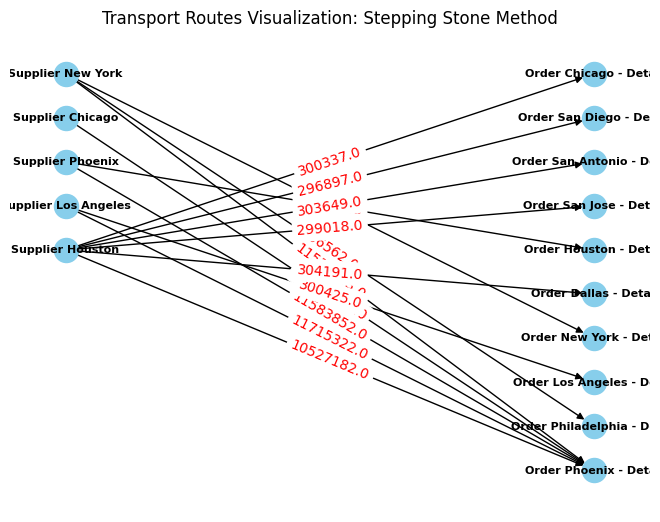

In [51]:
# Implementing the Stepping Stone Method
def stepping_stone_method(cost_matrix, initial_solution):
    rows, cols = cost_matrix.shape
    while True:
        u = np.full(rows, np.nan)
        v = np.full(cols, np.nan)
        u[0] = 0

        for i in range(rows):
            for j in range(cols):
                if initial_solution[i, j] > 0:
                    if not np.isnan(u[i]):
                        v[j] = cost_matrix[i, j] - u[i]
                    elif not np.isnan(v[j]):
                        u[i] = cost_matrix[i, j] - v[j]

        opportunity_cost = np.full((rows, cols), np.nan)
        for i in range(rows):
            for j in range(cols):
                if initial_solution[i, j] == 0:
                    if not np.isnan(u[i]) and not np.isnan(v[j]):
                        opportunity_cost[i, j] = cost_matrix[i, j] - (u[i] + v[j])

        min_opportunity_cost = np.nanmin(opportunity_cost)
        if min_opportunity_cost >= 0:
            break

        i, j = np.unravel_index(np.nanargmin(opportunity_cost), opportunity_cost.shape)

        path = [(i, j)]
        while True:
            for i2 in range(rows):
                if initial_solution[i2, path[-1][1]] > 0 and i2 != path[-1][0]:
                    path.append((i2, path[-1][1]))
                    break
            for j2 in range(cols):
                if initial_solution[path[-1][0], j2] > 0 and j2 != path[-1][1]:
                    path.append((path[-1][0], j2))
                    break
            if path[-1] == path[0]:
                break

        min_flow = np.min([initial_solution[i, j] for i, j in path[1::2]])
        for k in range(1, len(path), 2):
            initial_solution[path[k]] -= min_flow
        for k in range(0, len(path), 2):
            initial_solution[path[k]] += min_flow

    return initial_solution

# Optimize initial solution using Stepping Stone Method
optimized_solution_ssm = stepping_stone_method(cost_matrix, initial_solution_vam.copy())
total_cost_ssm = np.sum(optimized_solution_ssm * cost_matrix)

print("\nOptimized Solution using Stepping Stone Method:")
print(optimized_solution_ssm)
print(f"Total Transportation Cost: {total_cost_ssm}")

# Visualization of the transport routes using networkx and matplotlib
def visualize_routes(routes, supplier_locations, order_locations):
    G = nx.DiGraph()
    pos = {}

    # Adding nodes
    for i, supplier in enumerate(supplier_locations):
        G.add_node(f'Supplier {supplier}', pos=(0, -i))
        pos[f'Supplier {supplier}'] = (0, -i)

    for j, order in enumerate(order_locations):
        G.add_node(f'Order {order}', pos=(2, -j))
        pos[f'Order {order}'] = (2, -j)

    # Adding edges with the allocation amounts
    for route in routes:
        i, j, allocation = route
        G.add_edge(f'Supplier {supplier_locations[i]}', f'Order {order_locations[j]}', weight=allocation, label=allocation)

    # Drawing the graph
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title('Transport Routes Visualization: Stepping Stone Method')
    plt.show()

# Visualize the routes for the optimized solution
routes_ssm = [(i, j, optimized_solution_ssm[i, j]) for i in range(optimized_solution_ssm.shape[0]) for j in range(optimized_solution_ssm.shape[1]) if optimized_solution_ssm[i, j] > 0]
visualize_routes(routes_ssm, supplier_locations, order_locations)

In [ ]:
#Implementing the MODI Method
def modi_method(cost_matrix, initial_solution):
    rows, cols = cost_matrix.shape
    while True:
        u = np.full(rows, np.nan)
        v = np.full(cols, np.nan)
        u[0] = 0

        for i in range(rows):
            for j in range(cols):
                if initial_solution[i, j] > 0:
                    if not np.isnan(u[i]):
                        v[j] = cost_matrix[i, j] - u[i]
                    elif not np.isnan(v[j]):
                        u[i] = cost_matrix[i, j] - v[j]

        opportunity_cost = np.zeros((rows, cols))
        for i in range(rows):
            for j in range(cols):
                if initial_solution[i, j] == 0:
                    opportunity_cost[i, j] = cost_matrix[i, j] - (u[i] + v[j])

        if np.all(opportunity_cost >= 0):
            break

        i, j = np.unravel_index(np.argmin(opportunity_cost), opportunity_cost.shape)
        path = [(i, j)]
        while True:
            for i2 in range(rows):
                if initial_solution[i2, path[-1][1]] > 0 and i2 != path[-1][0]:
                    path.append((i2, path[-1][1]))
                    break
            for j2 in range(cols):
                if initial_solution[path[-1][0], j2] > 0 and j2 != path[-1][1]:
                    path.append((path[-1][0], j2))
                    break
            if path[-1] == path[0]:
                break

        min_flow = np.min([initial_solution[i, j] for i, j in path[1::2]])
        for k in range(1, len(path), 2):
            initial_solution[path[k]] -= min_flow
        for k in range(0, len(path), 2):
            initial_solution[path[k]] += min_flow

    return initial_solution

# Optimize initial solution using MODI Method
optimized_solution_modi = modi_method(cost_matrix, initial_solution_vam.copy())
total_cost_modi = np.sum(optimized_solution_modi * cost_matrix)

print("\nOptimized Solution using MODI Method:")
print(optimized_solution_modi)
print(f"Total Transportation Cost: {total_cost_modi}")


Handle Balanced and Unbalanced Scenarios

4. Warehouse Management

Optimize Inventory Levels

In [54]:
import pandas as pd

# Example function to optimize inventory levels with enhanced explanation
def optimize_inventory(sales_forecast, supplier_availability):
    # Calculate average production capacity
    average_production_capacity = supplier_availability['Production Capacities'].mean()

    # Combine sales forecast and average production capacity
    optimized_inventory = sales_forecast + average_production_capacity

    # Prepare explanation DataFrame
    explanation = pd.DataFrame({
        'Sales Forecast': sales_forecast,
        'Average Production Capacity': average_production_capacity,
        'Optimized Inventory Levels': optimized_inventory
    })

    return optimized_inventory, explanation

# Example usage
optimized_inventory_levels, explanation = optimize_inventory(sales_forecast1, supplier_availability)


In [55]:
# Print optimized inventory levels
print("Optimized Inventory Levels:")
optimized_inventory_levels

Optimized Inventory Levels:


2025-01-01    34604.210602
2025-02-01    31940.934422
2025-03-01    34953.108065
2025-04-01    33420.082886
2025-05-01    34080.252773
2025-06-01    34007.277308
2025-07-01    34122.674749
2025-08-01    35056.505050
2025-09-01    33666.643561
2025-10-01    34769.348348
2025-11-01    33926.772599
2025-12-01    34907.509368
Freq: MS, Name: AES Forecast, dtype: float64

In [56]:
# Print explanation DataFrame
print("\nExplanation:")
explanation


Explanation:


,Sales Forecast,Average Production Capacity,Optimized Inventory Levels
2025-01-01,34329.687867,274.522735,34604.210602
2025-02-01,31666.411687,274.522735,31940.934422
2025-03-01,34678.585330,274.522735,34953.108065
2025-04-01,33145.560151,274.522735,33420.082886
2025-05-01,33805.730038,274.522735,34080.252773
2025-06-01,33732.754572,274.522735,34007.277308
2025-07-01,33848.152013,274.522735,34122.674749
2025-08-01,34781.982314,274.522735,35056.505050
2025-09-01,33392.120825,274.522735,33666.643561
2025-10-01,34494.825612,274.522735,34769.348348


Monitor and Adjust Warehouse Operations

In [57]:
# Example function to monitor and adjust warehouse operations
def adjust_warehouse_operations(current_inventory, optimized_inventory):
    adjustments = optimized_inventory - current_inventory
    return adjustments

# Assuming current_inventory is already computed correctly
current_inventory = data.groupby('Warehouse ID')['Stock Levels'].sum()

# Example: Replace with your actual logic to calculate optimized inventory levels
def calculate_optimized_inventory(data):
    # Example: Calculate average stock levels as optimized inventory
    return data.groupby('Warehouse ID')['Stock Levels'].mean()

optimized_inventory_levels = calculate_optimized_inventory(data)

# Calculate adjustments needed
adjustments_needed = adjust_warehouse_operations(current_inventory, optimized_inventory_levels)

print("Adjustments Needed for Warehouse Operations:")
adjustments_needed


Adjustments Needed for Warehouse Operations:


Warehouse ID
1   -6.573429e+06
2   -6.700387e+06
3   -6.629086e+06
4   -6.739424e+06
5   -6.666090e+06
6   -6.622338e+06
7   -6.689200e+06
8   -6.708998e+06
9   -6.670361e+06
Name: Stock Levels, dtype: float64

In [60]:
import pandas as pd

def adjust_warehouse_operations(current_inventory, optimized_inventory):
  """Calculates adjustments needed to reach optimal stock levels."""
  adjustments = optimized_inventory - current_inventory
  return adjustments

def calculate_optimized_inventory(data, demand_factor=1, lead_time_factor=1):
  """Calculates optimized inventory considering demand and lead time."""
  # Group by warehouse and calculate average stock levels
  average_stock = data.groupby('Warehouse ID')['Stock Levels'].mean()

  # Consider demand (Sales Volume) with a weighting factor
  demand_adjustment = data.groupby('Warehouse ID')['Sales Volume'].mean() * demand_factor

  # Consider lead time with a weighting factor (assuming higher lead time needs more stock)
  lead_time_adjustment = data.groupby('Warehouse ID')['Lead Times'].mean() * lead_time_factor

  # Combine adjustments and add a safety stock buffer (optional)
  optimized_levels = average_stock + demand_adjustment + lead_time_adjustment + 10  # Add 10 units as safety stock (adjust as needed)

  return optimized_levels

# Assuming data is already loaded from your CSV

# Calculate current inventory (same as before)
current_inventory = data.groupby('Warehouse ID')['Stock Levels'].sum()

# Calculate optimized inventory with adjustments
optimized_inventory_levels = calculate_optimized_inventory(data)

# Calculate adjustments needed
adjustments_needed = adjust_warehouse_operations(current_inventory, optimized_inventory_levels)

print("Adjustments Needed for Warehouse Operations:")
adjustments_needed


Adjustments Needed for Warehouse Operations:


Warehouse ID
1   -6.573361e+06
2   -6.700319e+06
3   -6.629019e+06
4   -6.739355e+06
5   -6.666023e+06
6   -6.622270e+06
7   -6.689131e+06
8   -6.708930e+06
9   -6.670293e+06
dtype: float64

In [61]:
# (Optional) Decide on actions based on adjustments
for warehouse_id, adjustment in adjustments_needed.items():
  if adjustment > 0:
    print(f"Warehouse {warehouse_id} needs to reduce stock by {adjustment:.2f} units.")
  else:
    print(f"Warehouse {warehouse_id} is already at optimal level.")

Warehouse 1 is already at optimal level.
Warehouse 2 is already at optimal level.
Warehouse 3 is already at optimal level.
Warehouse 4 is already at optimal level.
Warehouse 5 is already at optimal level.
Warehouse 6 is already at optimal level.
Warehouse 7 is already at optimal level.
Warehouse 8 is already at optimal level.
Warehouse 9 is already at optimal level.


5. Scalability and Adaptability

Design for Scalability and Adaptability

In [70]:
# Example function to make the system scalable and adaptable
def scalable_forecasting(data):
    forecasts = []
    for period in range(1, 13):  # Forecasting for 12 months ahead
        fit = SARIMAX(data, seasonal_periods=12, trend='add', seasonal='add').fit()
        forecast = fit.forecast(period)
        forecasts.append(forecast)
    return forecasts

# Implement feedback mechanism for continuous improvement
def feedback_mechanism(actual_data, predicted_data):
    error = mean_squared_error(actual_data, predicted_data)
    adjustment_factor = 1 - (error / np.mean(actual_data))
    adjusted_forecast = predicted_data * adjustment_factor
    return adjusted_forecast

# Example of using the feedback mechanism
predicted_data = sales_forecast1
actual_data = sales_data[-12:]
adjusted_forecast = feedback_mechanism(actual_data, predicted_data)
print("Adjusted Forecast using Feedback Mechanism:")
adjusted_forecast


Adjusted Forecast using Feedback Mechanism:


2025-01-01   -1.762628e+06
2025-02-01   -1.625884e+06
2025-03-01   -1.780542e+06
2025-04-01   -1.701830e+06
2025-05-01   -1.735726e+06
2025-06-01   -1.731979e+06
2025-07-01   -1.737904e+06
2025-08-01   -1.785850e+06
2025-09-01   -1.714489e+06
2025-10-01   -1.771107e+06
2025-11-01   -1.727845e+06
2025-12-01   -1.778200e+06
Freq: MS, Name: AES Forecast, dtype: float64

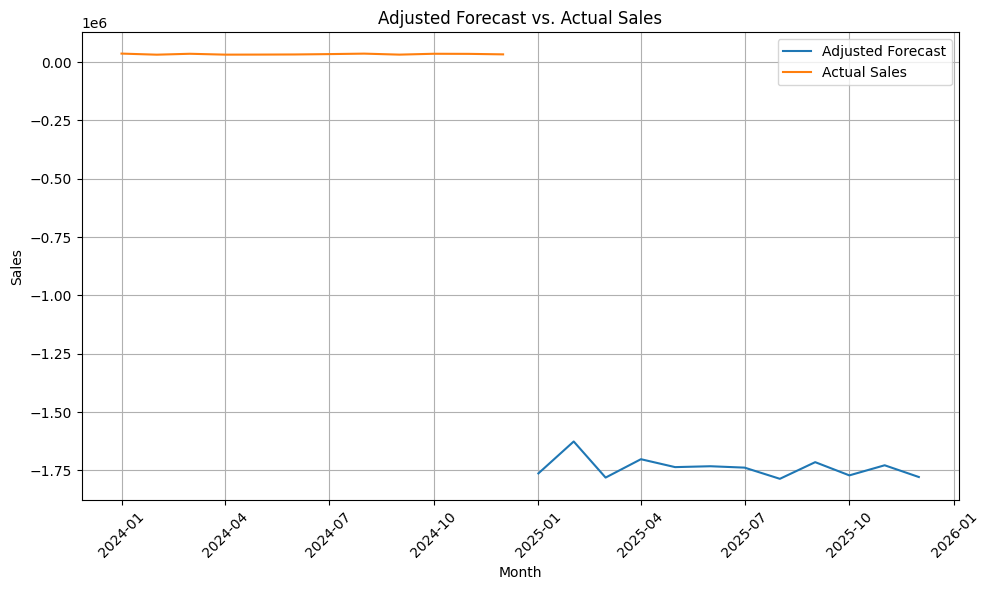

In [71]:
import matplotlib.pyplot as plt

# Assuming you have adjusted_forecast and actual_data from the previous code

# Define labels and titles
forecast_label = "Adjusted Forecast"
actual_label = "Actual Sales"
title = "Adjusted Forecast vs. Actual Sales"

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot adjusted forecast data
plt.plot(adjusted_forecast.index, adjusted_forecast.values, label=forecast_label)

# Plot actual data (assuming it has the same index as adjusted_forecast)
plt.plot(actual_data.index, actual_data.values, label=actual_label)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title(title)

# Add legend
plt.legend()

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()